# Decision Trees

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

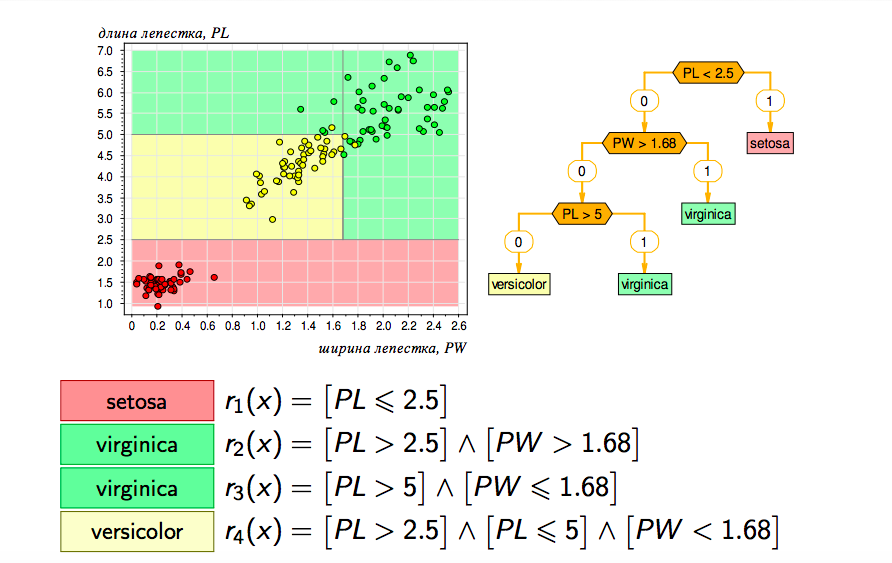

## Regression model

In [5]:
# Generating random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [7]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = RandomForestRegressor(max_depth=10, n_estimators=1000, criterion='mae')
regr_1.fit(X, y)
regr_2.fit(X,y)

RandomForestRegressor(criterion='mae', max_depth=10, n_estimators=1000)

In [9]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Regression')

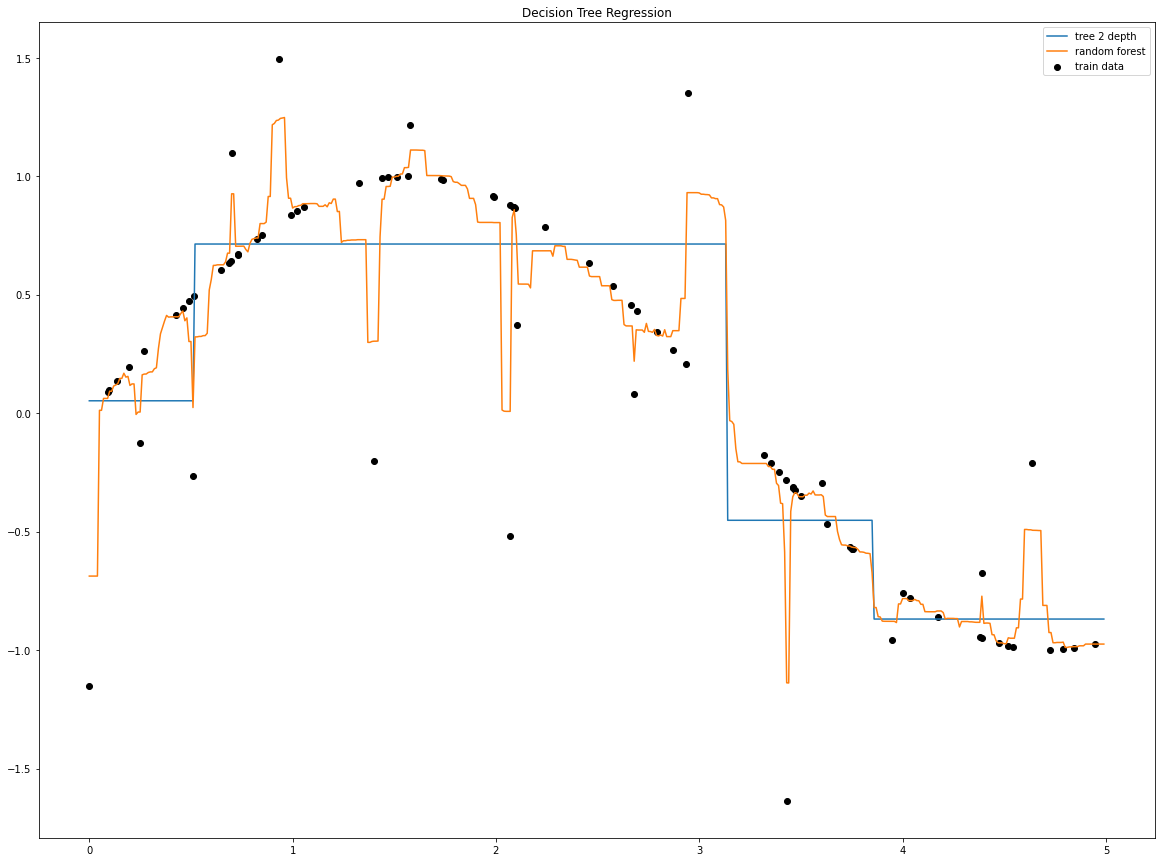

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))

ax.scatter(X, y, color='black', label='train data')
ax.plot(X_test, y_1, label="tree 2 depth")
ax.plot(X_test, y_2, label="random forest")

ax.legend()
ax.set_title("Decision Tree Regression")

# Построение деревьев

* Обучающая выборка $(x_i,y_i)_{i=1}^l\in X \times Y$
* Как разбить на две части: $R_1(j,s)=\{x|x_j \leq s\}$ и $R_2(j,s) = \{x | x_j > s \}$ с использованием критерия Q(X, j, s)?

Найдём наилучшие значения $j$ и $s$, создадим корневую вершину дерева, поставив ей в соответствие функцию (предикат) $[x_j \leq s ]$. Объекты выборки будут разбиты на две части и попадут либо в левое, либо в правое поддерево. Продолжим эту процедуру для каждой подвыборки. Если после очередного разбиения в одной из половин окажутся объекты одного из классов, то создадим листовую вершину, которой будет соответствовать класс попавших в неё объектов.

Жадный алгоритм переусложняет структуру дерева:
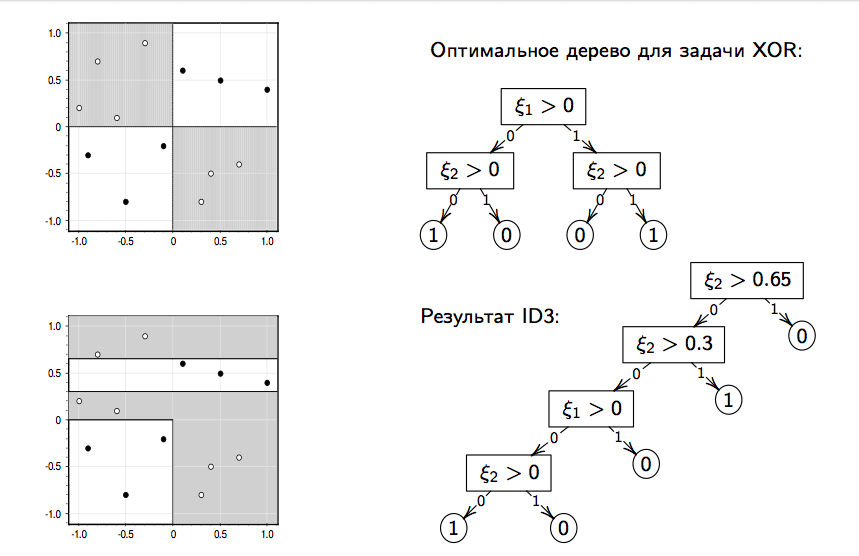

# Критерии информативности

* $R_m$ - множество объектов обучающей выборки, попавших в вершину $m$, 
* $N_m=|R_m|$.
* $p_{mk}$ - доля объектов класса $k\in\{1, ..., K\}$, попавших в вершину $m$: $p_{mk}=\frac{1}{N_m} \sum\limits_{x_i\in R_m} [y_i = k]$.
* $k_m = arg \max\limits_{k} p_{mk}$ - класс, чьих представителей больше всего среди объектов, попавших в вершину $m$.


## 1. Ошибка классификации

Если бы вершина $m$ была листовой и относила все объекты к классу $k$:

$$
H(R_m) = \frac{1}{N_m} \sum\limits_{x_i \in R_m} [y_i \neq k_m].
$$

Критерий информативности при ветвлении вершины $m$: ($l$ и $r$ - правые и левые вершины)

$$
Q(R_m, j, s) = H (R_m) - \frac{N_l}{N_m} H(R_l) - \frac{N_r}{N_m} H(R_r) \to \max\limits_{j, s}
$$

Грубый критерий - учитывает частоту $p_{m, k_m}$ лишь одного класса
#### Задача 1
Покажите, что ошибку классификации также можно записать в виде 
$$H(R_m) = 1 - p_{m, k_m}$$
#### Решение    
$$ 
1 = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m] + \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i = k_m] 
$$
$$
H(R_m) = \frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m}[y_i \neq k_m] = 1 - p_{m, k_m}
$$
  
## 2. Индекс Джини
* Функционал имеет вид $$ H(R_m) = \sum\limits_{k \neq k'}p_{mk}p_{mk'}$$
* Аналогично определяется критерий информативности:
$$
Q(R_m, j, s) = H(R_m) - \frac{N_l}{N_m} H(R_l) - \frac{N_r}{N_m} H(R_r).
$$
#### Задача 2

Покажите, что индекс Джини $H(R_m)$ также можно записать в виде: 

$$H(R_m) = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) = 1 - \sum_{k = 1}^K p_{mk}^2$$
  
#### Решение

$$
        \sum_{k \neq k'} p_{mk} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
$$

#### Задача 3

Рассмотрим вершину $m$ и объекты $R_m$, попавшие в нее. Сопоставим в соответствие вершине $m$ алгоритм $a(x)$, который выбирает класс случайно, причем класс $k$ выбирается с вероятностью $p_{mk}$. Покажите, что матожидание частоты ошибок этого алгоритма на объектах из $R_m$ равно индексу Джини.
#### Решение

\begin{multline*}
\mathbb E\frac{1}{N_m} \sum_{x_i \in R_m} [y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \mathbb E[y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} (1 - p_{m,y_i})
=\\
=
\sum_{k = 1}^{K} \frac{\sum_{(x_i,\,y_i) \in R_m} [y_i = k]}{N_m} (1 - p_{mk})
=
\sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
\end{multline*}

Выясним теперь, какой смысл имеет максимизация функционала, соответствующего критерию информативности Джини.
Сразу выбросим из функционала $H(R_m)$, поскольку данная величина не зависит от $j$ и $s$.
Преобразуем критерий:

\begin{align*}
&- \frac{N_\ell}{N_m} H(R_\ell) - \frac{N_r}{N_m} H(R_r)=- \frac{1}{N_m} \left(
N_\ell - \sum_{k = 1}^{K} p_{\ell k}^2 N_\ell + N_r - \sum_{k = 1}^{K} p_{r k}^2 N_r \right)=\\
&=
\frac{1}{N_m} \left(\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell +\sum_{k = 1}^{K} p_{r k}^2 N_r - N_m
\right)= \{\text{$N_m$ не зависит от $j$ и $s$}\} = \\
&=\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell + \sum_{k = 1}^{K} p_{r k}^2 N_r.
\end{align*}

Запишем теперь в наших обозначениях число таких пар объектов $(x_i, x_j)$,
что оба объекта попадают в одно и то же поддерево, и при этом $y_i = y_j$.
Число объектов класса $k$, попавших в поддерево $\ell$,
равно $p_{\ell k} N_\ell$;
соответственно, число пар объектов с одинаковыми метками, попавших в левое
поддерево, равно $\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2$.
Интересующая нас величина равна
$$
\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2 + \sum_{k = 1}^{K} p_{r k}^2 N_r^2.
$$
Заметим, что данная величина очень похожа на полученное
выше представление для критерия Джини.
Таким образом, максимизацию функционала Джини можно <i>условно</i>
интерпретировать как максимизацию числа пар объектов одного класса,
оказавшихся в одном поддереве.

## 3. Энтропийный критерий (критерий Шеннона)
Рассмотрим дискретную случайную величину,
принимающую $K$ значений с вероятностями $p_1, \dots, p_K$
соответственно.
*** Энтропия *** этой случайной величины определяется как:
$$H(p) = -\sum_{k = 1}^{K} p_k \log_2 p_k$$

#### Задача 4
Покажите, что энтропия ограничена сверху и достигает своего максимума на
равномерном распределении $p_1 = \dots = p_K = 1/K$.

#### Решение

Нам понадобится неравенство Йенсена: для любой вогнутой функции $f$
выполнено
$$
    f\left(\sum_{i = 1}^{n} a_i x_i\right) \geq \sum_{i = 1}^{n} a_i f(x_i),
$$
если $\sum_{i = 1}^{n} a_i = 1$.

Применим его к логарифму в определении энтропии~(он является вогнутой функцией):
$$
H(p) = \sum_{k = 1}^{K} p_k \log_2 \frac{1}{p_k}
\leq \log_2 \left( \sum_{k = 1}^{K} p_i \frac{1}{p_i} \right)=\log_2 K.
$$

Наконец, найдем энтропию равномерного распределения:
$$
-\sum_{k = 1}^{K} \frac{1}{K} \log_2 \frac{1}{K} = - K \frac{1}{K} \log_2 \frac{1}{K} = \log_2 K.
$$ 

Энтропия ограничена снизу нулем, причем минимум достигается на вырожденных
распределениях ($p_i = 1$, $p_j = 0$ для $i \neq j$).

Энтропийный критерий информативности определяется как
$$
    Q(R_m, j, s) = H(p_m) - \frac{N_\ell}{N_m} H(p_\ell) - \frac{N_r}{N_m} H(p_r),
$$
где $p_i = (p_{i1}, \dots, p_{iK})$ - распределение классов в $i$-й вершине.
Видно, что данный критерий отдает предпочтение более "вырожденным" распределениям
классов.

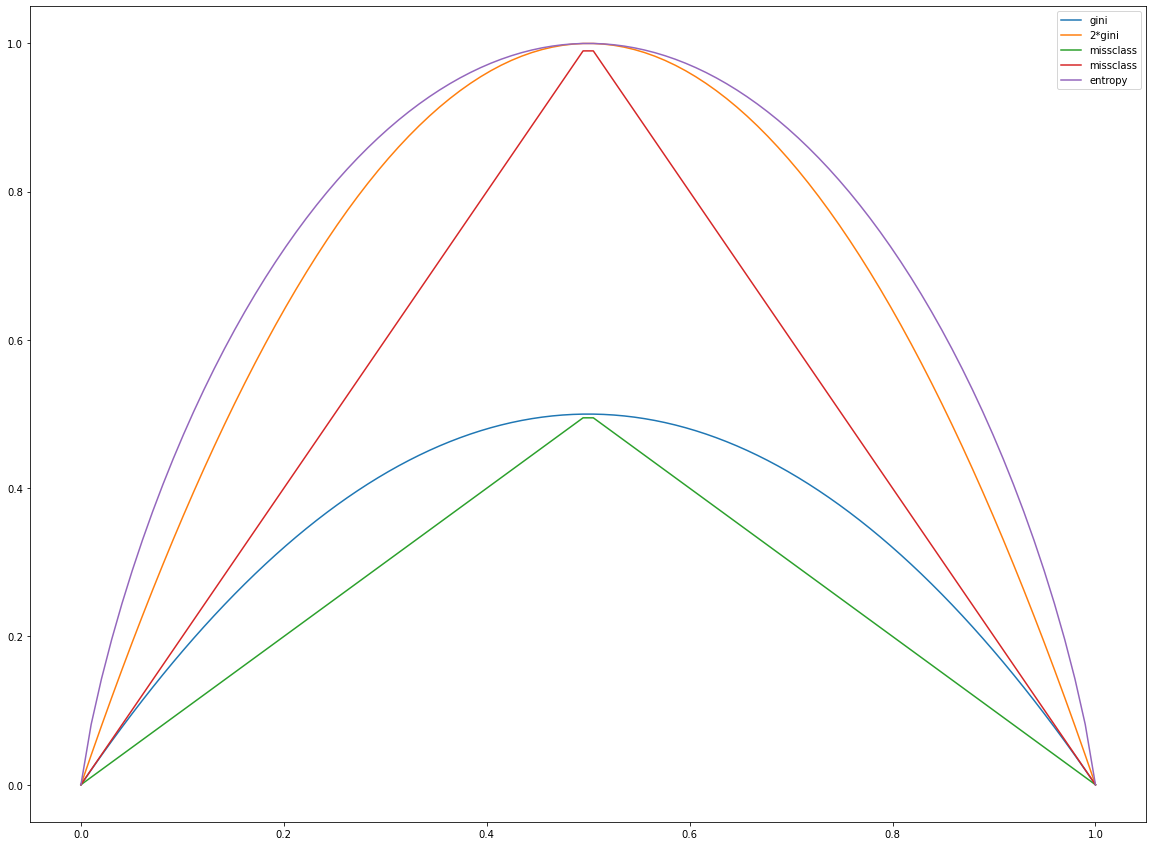

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
p = np.linspace(0, 1, 100)

ax.plot(p, (lambda x: 2*(x)*(1-x))(p), label='gini')
ax.plot(p, (lambda x: 4*x*(1-x))(p), label='2*gini')
ax.plot(p, [ 1 - max(x, 1-x) for x in p], label='missclass')
ax.plot(p, [ 2 - 2*max(x, 1-x) for x in p], label='missclass')
ax.plot(p, (lambda x: -x*np.log2(x + 1e-10) - (1-x)*np.log2(1 - x + 1e-20))(p) , label='entropy')

ax.legend()

# Пример: предсказание цвета шарика по его координате
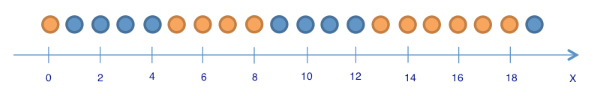
* Вероятности вытаскивания синего и жёлтого шариков соответственно: $$ p_1 = \frac{9}{20}, p_2 = \frac{11}{20}$$  
* Энтропия такого состояния: $$ S_0 = -\frac{9}{20} log_2 \frac{9}{20} - \frac{11}{20} log_2 \frac{11}{20} \approx 1$$  
Как изменится энтропия, если разбить шарики на две группы?  
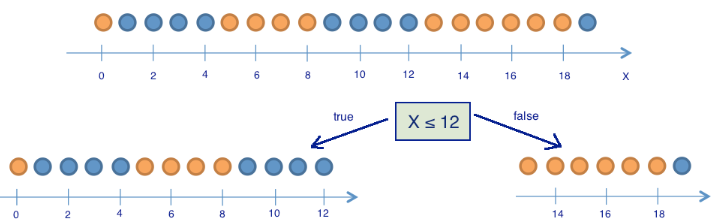  
  
    
* Для первой группы: $$ S_1 = -\frac{8}{13} log_2 \frac{8}{13} - \frac{5}{13} log_2 \frac{5}{13} \approx 0,96 $$

* И для второй: $$ S_2 = -\frac{6}{7} log_2 \frac{6}{7} - \frac{1}{7} log_2 \frac{1}{7} \approx 0,6 $$

* Энтропия уменьшилась в обеих группах. 
* Мера прироста информации:
$$IG(Q) = S_0 - \sum\limits_{i=1}^q \frac{N_i}{N} S_i $$
где q - число групп после разбиения, $N_i$ - число элементов выборки, у которых признак $Q$ имеет $i$-е значение.
* $$IG(x\leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16$$
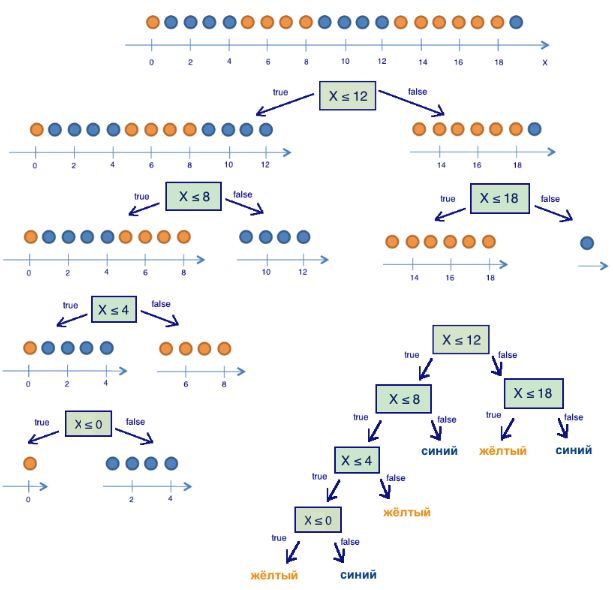
* Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($log_2 ⁡1=0$), что соответствует представлению, что группа шариков одного цвета – упорядоченная.

## 4. Критерии в задачах регрессии
В задачах регрессии, как правило, в качестве критерия выбирают дисперсию ответов в листе:
$$
H_R(R_m) = \frac{1}{N_m} \sum_{(x_i,\,y_i) \in R_m} \left(y_i-\frac{1}{N_m}\sum_{(x_i,\,y_i) \in R_m} y_j \right)^2.
$$
Можно использовать и другие критерии - например, среднее абсолютное отклонение от медианы.

# Критерий останова построения дерева

Для любой непротиворечивой обучающей выборки можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке. Если мы рассмотрим объекты, как точки в пространстве признаков, то каждую эту точку можно ограничить n-мерным кубиком, который не будет содержать других точек. n-мерный кубик прекрасно можно задать деревом.  
 Однако в этом случае имеет место **переобучение**. 

В связи с этим встаёт вопрос: в каком случае вершину следует объявить листовой?
Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевой переменной — расстояние от объекта до точки (0, 0).

In [30]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 0].max() + 1
    return np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

In [39]:
data_x = np.random.normal(size = (100, 2))
data_y = (data_x[:, 0]**2 + data_x[:, 1]**2)**0.5

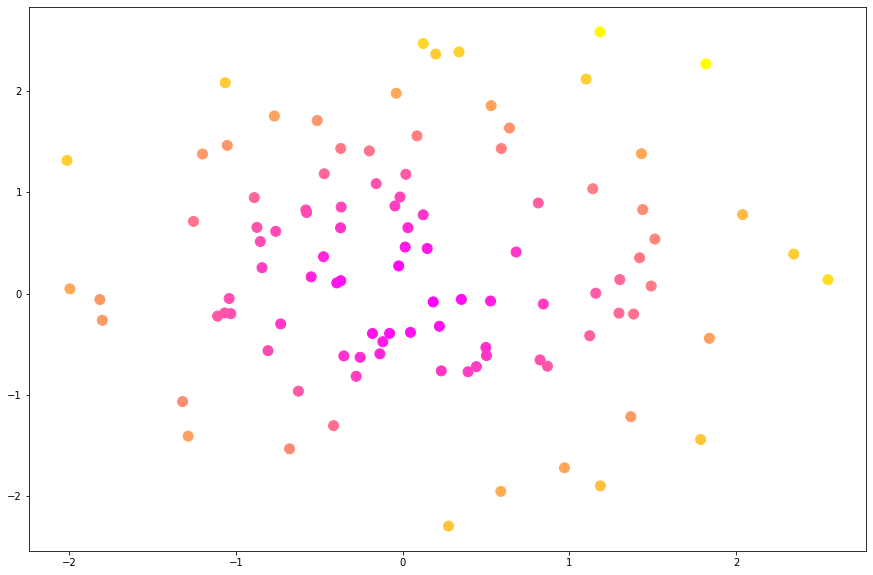

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [41]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

DecisionTreeRegressor()

C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/1593430209.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, predicted,cmap='spring')


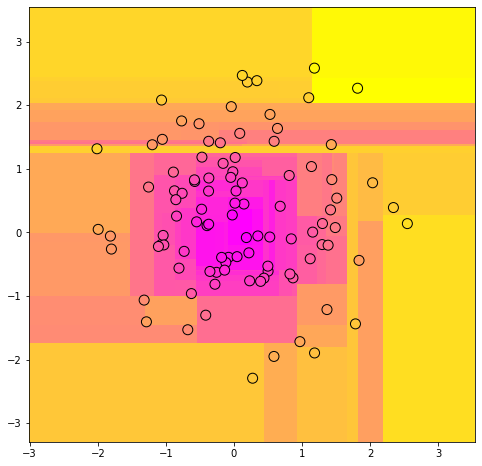

In [48]:
xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.pcolormesh(xx, yy, predicted,cmap='spring')
ax.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/3406299802.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[j].pcolormesh(xx,yy, predicted, cmap='spring')
C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/3406299802.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[j].pcolormesh(xx,yy, predicted, cmap='spring')
C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/3406299802.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have 

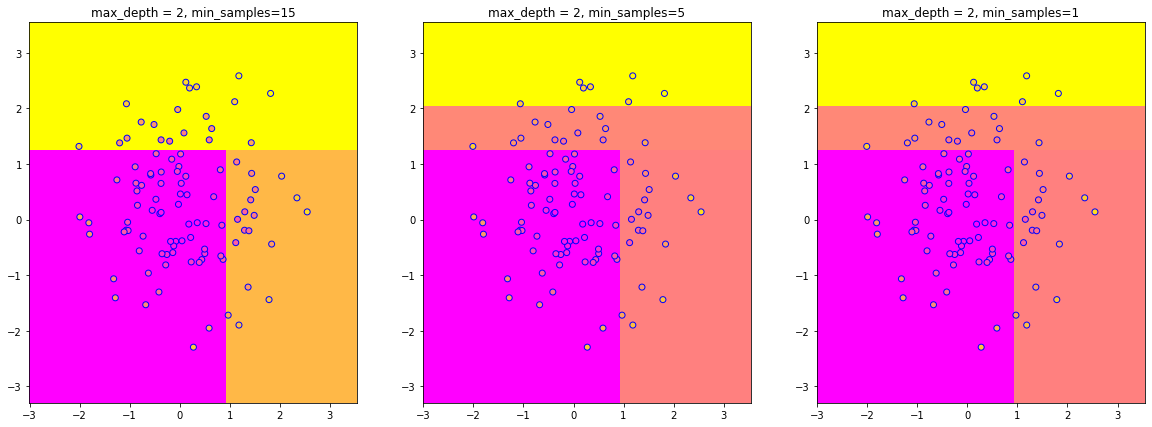

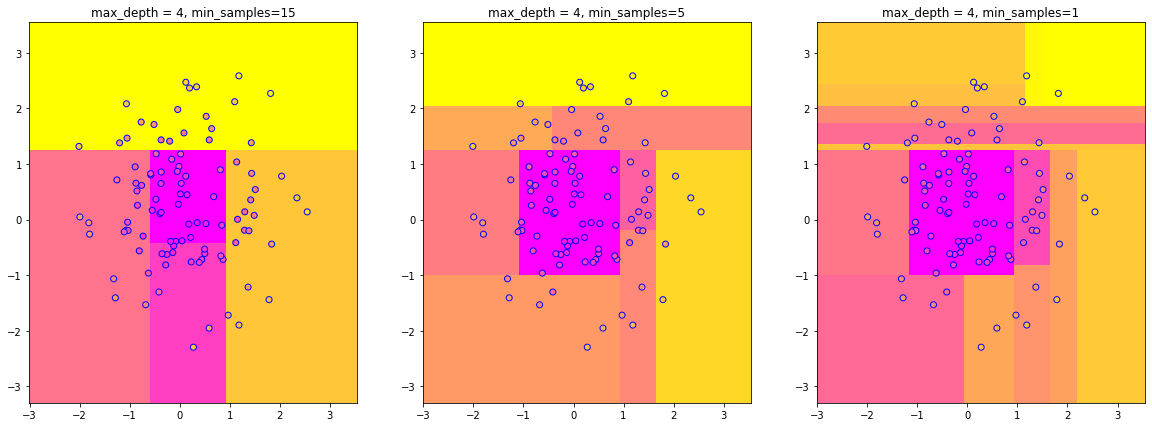

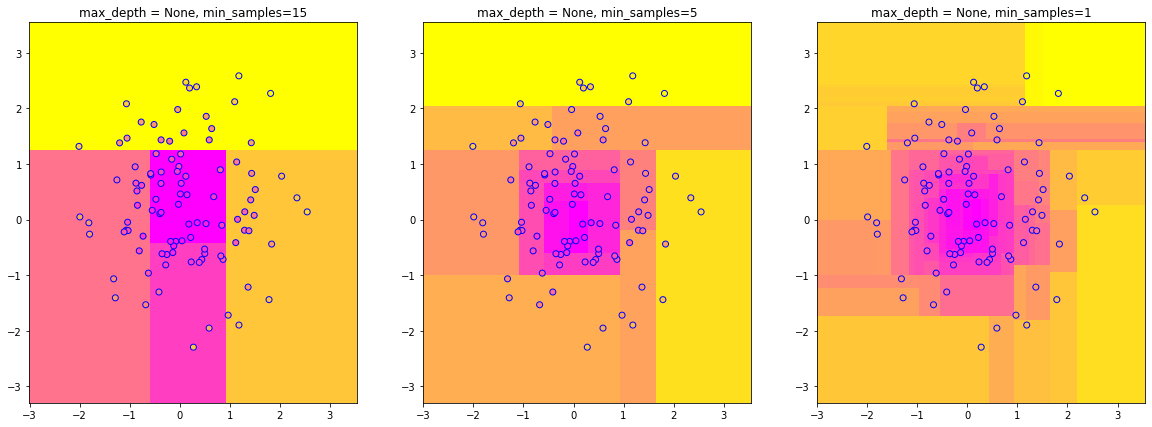

In [56]:
for i, max_depth in enumerate([2, 4, None]):
    fig, ax = plt.subplots(1, 3, figsize=(20,7))
    for j, min_samples_leaf in enumerate([15,5,1]):
        
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        ax[j].pcolormesh(xx,yy, predicted, cmap='spring')
        ax[j].scatter(data_x[:,0], data_x[:,1], c = data_y ,cmap='spring', edgecolor='b')
        ax[j].set_title(f"max_depth = {max_depth}, min_samples={min_samples_leaf}")

C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/1418337305.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[i].pcolormesh(xx,yy, predicted, cmap='spring')
C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/1418337305.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[i].pcolormesh(xx,yy, predicted, cmap='spring')
C:\Users\Windows\AppData\Local\Temp/ipykernel_7968/1418337305.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have 

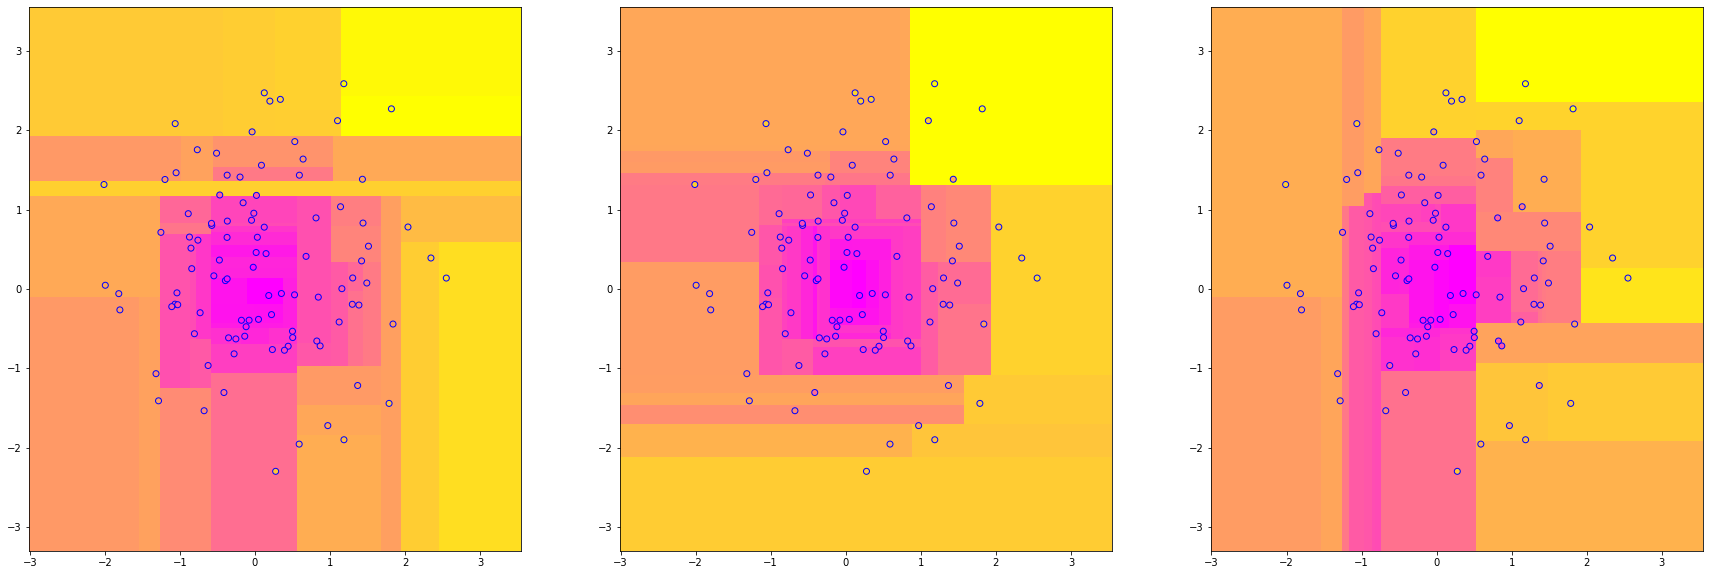

In [59]:
fig, ax = plt.subplots(1,3,figsize=(30,10))

for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)
    
    indx = np.random.randint(data_x.shape[0], size=int(data_x.shape[0]*0.9))
    clf.fit(data_x[indx], data_y[indx])
    
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    ax[i].pcolormesh(xx,yy, predicted, cmap='spring')
    ax[i].scatter(data_x[:,0], data_x[:,1], c = data_y ,cmap='spring', edgecolor='b')